In [87]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [88]:
df = pd.read_parquet("training_dataset.parquet")
df.head(20)

,user_id,age,gender,location,income,education,loyalty_status,account_age_days,premium,device,...,event_vector_ticket_created,event_vector_view_product,event_vector_wishlist_add,avg_rating,total_reviews,avg_text_length,avg_sentiment_score,topic_vector,last_review_days,churned
0,c4ca4238a0b9,27,Male,East,40682,Bachelor,Gold,31,True,Web,...,16,17,11,4.0,1.0,1177.0,0.9132,"[-0.02189598, 0.04437094, 0.037372954, -0.0251...",69.0,0
1,c81e728d9d4c,29,Male,West,15317,Masters,Regular,861,False,iOS,...,12,22,17,0.0,0.0,0.0,0.0000,None,774.0,0
2,eccbc87e4b5c,37,Male,West,38849,Bachelor,Silver,16,True,iOS,...,18,21,15,0.0,0.0,0.0,0.0000,None,774.0,0
3,a87ff679a2f3,30,Male,South,11568,HighSchool,Regular,1,False,iOS,...,24,26,23,0.0,0.0,0.0,0.0000,None,774.0,0
4,e4da3b7fbbce,31,Female,North,46952,College,Regular,11,False,Web,...,21,17,19,0.0,0.0,0.0,0.0000,None,774.0,0
5,1679091c5a88,38,Male,South,7347,Bachelor,Silver,283,True,Web,...,5,6,8,0.0,0.0,0.0,0.0000,None,774.0,0
6,8f14e45fceea,32,Female,South,8265,Bachelor,Silver,114,True,Android,...,31,21,25,0.0,0.0,0.0,0.0000,None,774.0,0
7,c9f0f895fb98,24,Female,North,47773,HighSchool,Regular,1407,False,Android,...,10,14,8,0.0,0.0,0.0,0.0000,None,774.0,1
8,45c48cce2e2d,27,Male,East,19154,College,Regular,229,False,Web,...,10,14,8,0.0,0.0,0.0,0.0000,None,774.0,0
9,d3d9446802a4,28,Female,North,24666,HighSchool,Regular,109,False,iOS,...,7,8,5,0.0,0.0,0.0,0.0000,None,774.0,0


In [89]:
df.shape

(100000, 40)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 40 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   user_id                              100000 non-null  object 
 1   age                                  100000 non-null  int64  
 2   gender                               100000 non-null  object 
 3   location                             100000 non-null  object 
 4   income                               100000 non-null  int64  
 5   education                            100000 non-null  object 
 6   loyalty_status                       100000 non-null  object 
 7   account_age_days                     100000 non-null  int64  
 8   premium                              100000 non-null  bool   
 9   device                               100000 non-null  object 
 10  total_events                         100000 non-null  int64  
 11  purchase_count

In [91]:
# Get null counts for all columns
null_counts = df.isnull().sum()

# Filter columns with nulls
null_counts = null_counts[null_counts > 0]/df.shape[0]
print(null_counts)

topic_vector    0.95215
dtype: float64


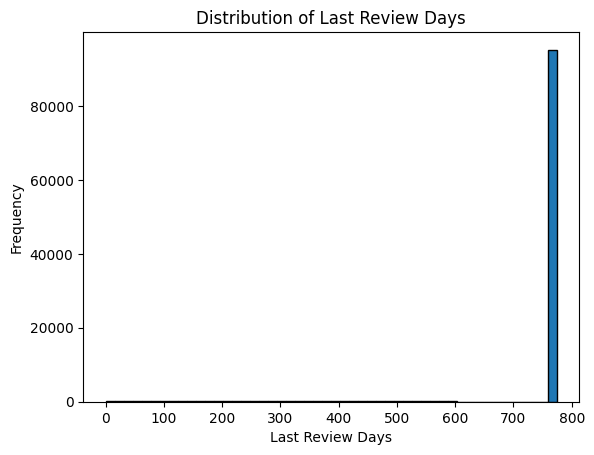

In [92]:
import matplotlib.pyplot as plt
plt.hist(df['last_review_days'], bins=50, edgecolor='black')
plt.title('Distribution of Last Review Days')
plt.xlabel('Last Review Days')
plt.ylabel('Frequency')
plt.show()

In [93]:
df['has_reviewed'] = np.where(df['last_review_days'] != 774, 1, 0)

In [94]:
embedding_dim = 384

df["topic_vector"] = df["topic_vector"].apply(
    lambda x: x if isinstance(x, np.ndarray) else np.zeros(embedding_dim)
)

In [95]:
# ---- 1. Fix NaN vectors ----
topic_dim = len(df["topic_vector"].dropna().iloc[0])

df["topic_vector"] = df["topic_vector"].apply(
    lambda x: x if isinstance(x, list) else [0] * topic_dim
)

# ---- 2. Convert to 2D numpy array ----
topic_array = np.vstack(df["topic_vector"].values)

# ---- 3. Expand feature columns ----
for i in range(topic_dim):
    df[f"topic_vector_{i}"] = topic_array[:, i]

# ---- 4. Drop original list column ----
df = df.drop(columns=["topic_vector"])

C:\Users\SURIYA\AppData\Local\Temp\ipykernel_11420\2996370974.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"topic_vector_{i}"] = topic_array[:, i]
C:\Users\SURIYA\AppData\Local\Temp\ipykernel_11420\2996370974.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"topic_vector_{i}"] = topic_array[:, i]
C:\Users\SURIYA\AppData\Local\Temp\ipykernel_11420\2996370974.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  

In [96]:
df['churned'].value_counts(normalize=True)

churned
0    0.50201
1    0.49799
Name: proportion, dtype: float64

In [97]:
y = df['churned']
X = df.drop(['churned', 'user_id'], axis=1)

In [98]:
# Identify categorical features
categorical_features = ['gender', 'loyalty_status', 'device', 'location', 'education']

# One-hot encode categorical features
X_encoded = pd.get_dummies(X, columns=categorical_features, drop_first=False)

# Update X to encoded version
X = X_encoded

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [100]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(max_iter=500)
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

from sklearn.metrics import classification_report, roc_auc_score
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))
print("Logistic Regression ROC AUC Score:", roc_auc_score(y_test, model_lr.predict_proba(X_test)[:,1]))

c:\Users\SURIYA\Desktop\ML Projects\Enterprise_Feature_Store\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 500 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=500).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.59      0.55     10040
           1       0.50      0.42      0.46      9960

    accuracy                           0.51     20000
   macro avg       0.51      0.51      0.50     20000
weighted avg       0.51      0.51      0.50     20000

Logistic Regression ROC AUC Score: 0.5041452463239412


In [102]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest ROC AUC Score:", roc_auc_score(y_test, model_rf.predict_proba(X_test)[:,1]))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.56      0.53     10040
           1       0.50      0.45      0.48      9960

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000

Random Forest ROC AUC Score: 0.506273235371766
Random Forest ROC AUC Score: 0.506273235371766


In [ ]:
import xgboost as xgb
model_xgb = xgb.XGBClassifier(eval_metric="logloss")
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)

print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print("XGBoost ROC AUC Score:", roc_auc_score(y_test, model_xgb.predict_proba(X_test)[:,1]))